# Scalability of MPBNs on random instances

In this notebook, we apply the [`mpbn`](https://github.com/pauleve/mpbn) Python implementation of Most Permissive Boolean Networks (MPBNs) on very large scale Boolean networks (BNs) instances.

The instances have been generated from scale-free random network structure, on which has been applied the inhibitor-dominant rule to devise the logical functions.
The generated networks range from 1,000 to 100,000 nodes, with in-degrees ranging up to 1400. See https://doi.org/10.5281/zenodo.3714876 for more information.

The following computations are measured:
* computation of 1 attractor;
* enumeration of (at most) 1000 attractors;
* enumeration of (at most) 1000 attractors *reachable* from random initial configurations.

The computation times exclude the time for parsing the input text file.

In [1]:
!uname -p

Intel(R) Xeon(R) E-2124 CPU @ 3.30GHz


In [2]:
import time

import numpy.random
import matplotlib.pyplot as plt

import mpbn

In [3]:
def attractors(mbn,limit):
    return len(list(mbn.attractors(limit=limit)))
def reachable_attractors(mbn, init):
    return len(list(mbn.attractors(reachable_from=init, limit=1000)))

def time_call(func, *args):
    t1 = time.perf_counter()
    func(*args)
    t2 = time.perf_counter()
    return t2-t1

def computations(mbn, d):
    n = len(mbn)
    d["a1"].append((n,time_call(attractors, mbn, 1)))
    d["a1000"].append((n,time_call(attractors, mbn, 1000)))
    # compute reachable attractors from 3 random initial configurations
    for _ in range(3):
        init = dict(zip(mbn, numpy.random.choice([0,1],len(mbn))))
        d["reach_a"].append((n,time_call(reachable_attractors, mbn, init)))

In [4]:
networks = [
 'random-1000-1.bnet',
 'random-1000-2.bnet',
 'random-1000-3.bnet',
 'random-1000-4.bnet',
 'random-2000-1.bnet',
 'random-2000-2.bnet',
 'random-2000-3.bnet',
 'random-2000-4.bnet',
 'random-5000-1.bnet',
 'random-5000-2.bnet',
 'random-5000-3.bnet',
 'random-5000-4.bnet',
 'random-10000-1.bnet',
 'random-10000-2.bnet',
 'random-10000-3.bnet',
 'random-10000-4.bnet',
 'random-20000-1.bnet',
 'random-20000-2.bnet',
 'random-20000-3.bnet',
 'random-20000-4.bnet',
 'random-50000-1.bnet',
 'random-50000-2.bnet',
 'random-50000-3.bnet',
 'random-50000-4.bnet',
 'random-100000-1.bnet',
 'random-100000-2.bnet',
 'random-100000-3.bnet',
 'random-100000-4.bnet']

In [5]:
d = {"a1": [], "a1000": [], "reach_a": []}
for filename in networks:
        mbn = mpbn.load(f"https://zenodo.org/record/3714876/files/{filename}?download=1")
        computations(mbn, d)

Downloading https://zenodo.org/record/3714876/files/random-1000-1.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-1000-2.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-1000-3.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-1000-4.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-2000-1.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-2000-2.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-2000-3.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-2000-4.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-5000-1.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-5000-2.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-5000-3.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-5000-4.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-10000-1.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-10000-2.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-10000-3.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-10000-4.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-20000-1.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-20000-2.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-20000-3.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-20000-4.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-50000-1.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-50000-2.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-50000-3.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-50000-4.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-100000-1.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-100000-2.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-100000-3.bnet?download=1

Downloading https://zenodo.org/record/3714876/files/random-100000-4.bnet?download=1

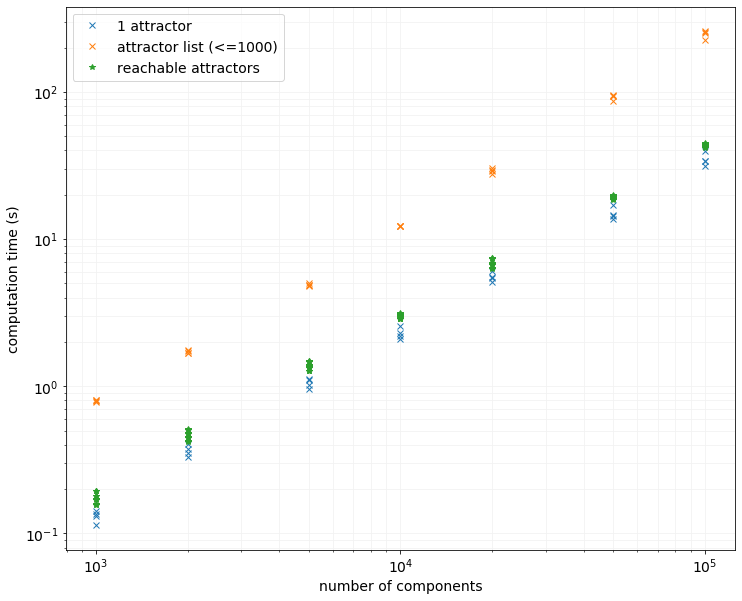

In [6]:
legend ={
    "a1": "1 attractor",
    "a1000": "attractor list (<=1000)",
    "reach_a": "reachable attractors",
}
marker = {
    "a1": "x",
    "a1000": "x",
    "reach_a": "*",
}
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 14})
for k, v in d.items():
    x,y = zip(*v)
    plt.plot(x, y, linestyle='none', marker=marker[k], label=legend[k])
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(which='both',color='0.95')
plt.ylabel("computation time (s)")
plt.xlabel("number of components")
plt.savefig("generated/scalability-random.pdf");